<a href="https://colab.research.google.com/github/2303a51731/2303a51731_applications_of_data_mining/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

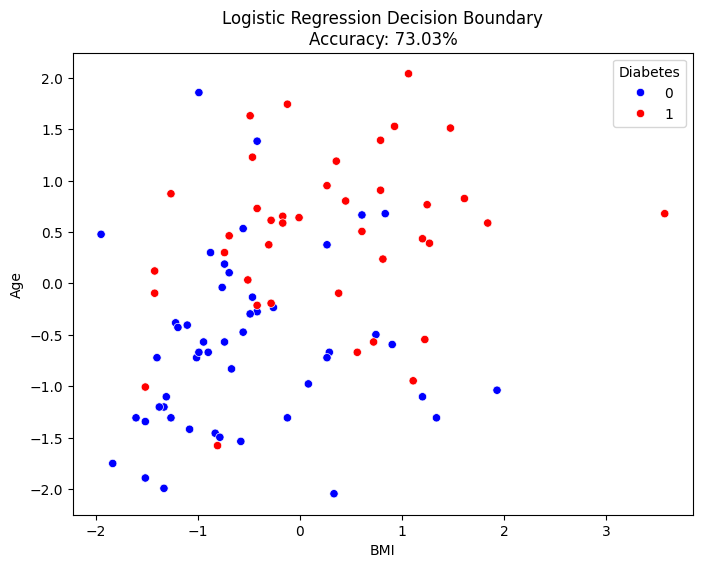

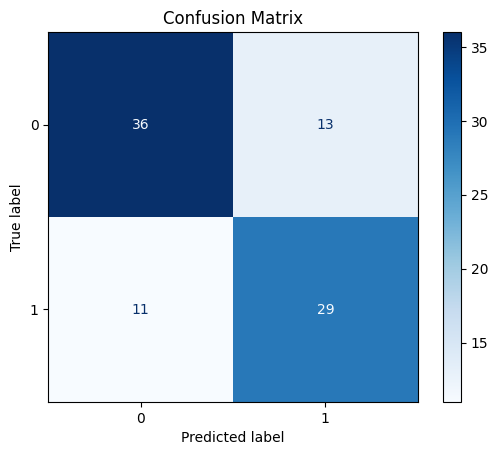

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
print(diabetes.target)
print(X)

# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
y_binary = (y > np.median(y)).astype(int)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
# evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
	accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

   Alcohol  ColorIntensity
0    14.23            5.64
1    13.20            4.38
2    13.16            5.68
3    14.37            7.80
4    13.24            4.32


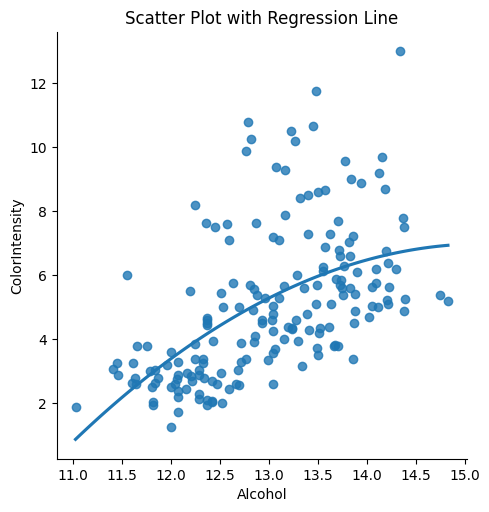

<ipython-input-8-54a86148022d>:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_binary.fillna(method='ffill', inplace=True)
<ipython-input-8-54a86148022d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method='ffill', inplace=True)
<ipython-input-8-54a86148022d>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace=True)


Model R² Score: 0.3512


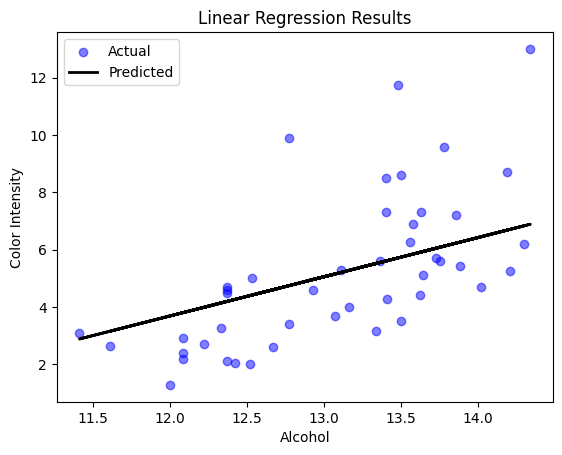

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = '/content/wine.csv'
df = pd.read_csv(file_path)

# Selecting two columns for regression analysis
df_binary = df[['Alcohol', 'Color.int']]
df_binary.columns = ['Alcohol', 'ColorIntensity']  # Rename columns

# Display the first few rows
print(df_binary.head())

# Plotting the relationship
sns.lmplot(x="Alcohol", y="ColorIntensity", data=df_binary, order=2, ci=None)
plt.title("Scatter Plot with Regression Line")
plt.show()

# Handle missing values (if any)
df_binary.fillna(method='ffill', inplace=True)
df_binary.dropna(inplace=True)

# Defining features and target
X = np.array(df_binary['Alcohol']).reshape(-1, 1)
y = np.array(df_binary['ColorIntensity']).reshape(-1, 1)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initializing and training the model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Evaluating model performance
score = regr.score(X_test, y_test)
print(f"Model R² Score: {score:.4f}")

# Making predictions
y_pred = regr.predict(X_test)

# Plotting actual vs predicted values
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test, y_pred, color='black', linewidth=2, label='Predicted')
plt.title("Linear Regression Results")
plt.xlabel("Alcohol")
plt.ylabel("Color Intensity")
plt.legend()
plt.show()


Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Decision Tree rules:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.

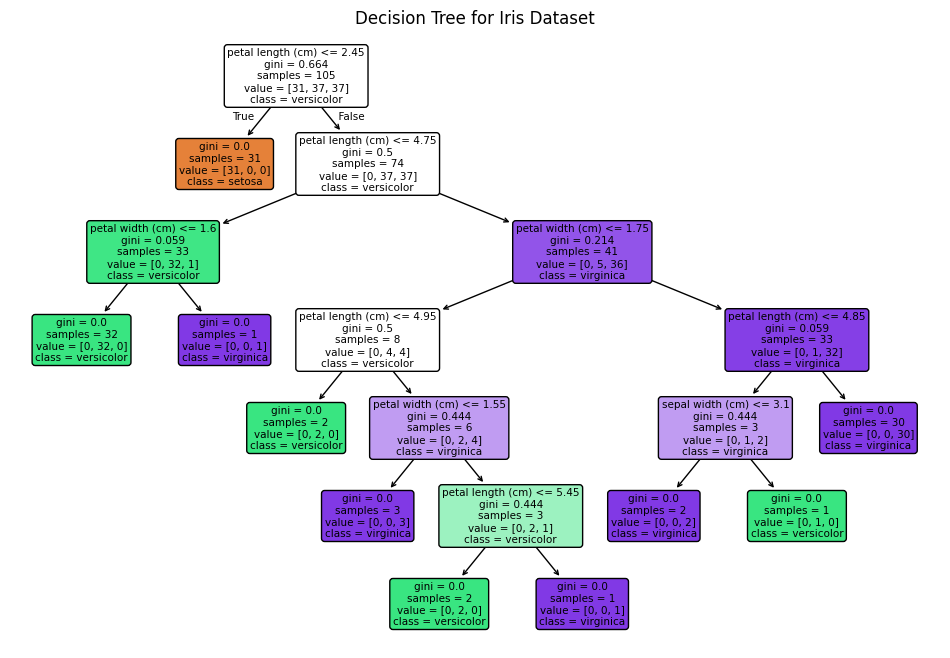

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report

# Load a sample dataset (Iris dataset)
data = load_iris()
X = data.data  # Features
y = data.target  # Labels

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating the Decision Tree classifier model
clf = DecisionTreeClassifier(random_state=42)

# Training the model on the training data
clf.fit(X_train, y_train)

# Making predictions on the test data
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can visualize the tree if needed (requires graphviz)
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
print("\nDecision Tree rules:")
print(export_text(clf, feature_names=data.feature_names))
# Plotting the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names, rounded=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()